# Answering House Prices Questions using Advanced Regression Techniques

## Background

As a Udemy [Data Scientist](https://www.udacity.com/enrollment/nd025) Nanodegree Program student, I'm tasked with writing a blog post and a kernel following the [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) process. 

The Kaggle [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques) competition is a fantastic playground for budding data scientists like myself. It challenges us to predict house prices in Ames, Iowa, leveraging 79 predictor variables through machine learning models. This well-analyzed dataset has received over 20,000 submissions, making it an excellent resource for developing and showcasing our skills.

The notebook and source code is available here:

- Blog post: <https://blog.anibalhsanchez.com/en/blogging/85-answering-house-prices-questions-using-advanced-regression-techniques.html>
- Repository: <https://github.com/anibalsanchez/answering-house-prices-questions-based-on-advanced-regression-techniques>

## Objectives

In my blog post, I'll take a fresh approach by adhering to the CRISP-DM process to address three fundamental questions often posed in the housing markets, using the Ames dataset as a case study.

### What are the main house price ranges?

**Identify the primary price ranges for houses in the dataset**. It's essential to identify the specific price ranges encompassing most homes and their distribution. This information will help segment the housing market and tailor the analysis to the most relevant price ranges.

### Which areas can you locate these price ranges?

**Determine the areas or neighborhoods where these price ranges are concentrated**. It is crucial to identify the geographic areas or neighborhoods associated with different price ranges. I can uncover patterns and identify undervalued or overvalued regions by mapping price ranges to specific areas.

### What variables best predict the price range of each home?

**Identify the key variables that best predict the price range of each home**. The dataset contains numerous features describing various aspects of the houses, such as the number of bedrooms, bathrooms, lot size, construction materials, and neighborhood characteristics. Determining the most influential variables that accurately predict the price range for individual homes is vital. This information can guide feature engineering efforts and ensure the most relevant predictors are included in the modeling process.

Following the CRISP-DM process, I'll systematically analyze and preprocess the data, build predictive models, and present the findings in a comprehensive blog post and notebook. This project will allow me to showcase my skills, including data exploration, feature engineering, model selection, and result interpretation.

## Exploring the Data

To start the project, I imported the packages, defined the global variables, and read the Ames, Iowa train dataset CSV file. 

In [76]:
import numpy as np
import pandas as pd
from math import expm1
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

head_n_of_records = 5
seed = 42

init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

plt.style.use('bmh')
sns.set_style({'axes.grid':False})

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore", category=FutureWarning)

# Define a color-blind friendly palette
# Using a palette from ColorBrewer which is designed to be color-blind friendly
colorblind_palette = sns.color_palette("colorblind", n_colors=8)

# Show all rows and colums
pd.options.display.max_rows = None
pd.options.display.max_columns = None

%matplotlib inline

study_data = pd.read_csv("train.csv")
study_data_num_rows, study_data_num_columns = (
    study_data.shape
)

# Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def display_md(string):
    display(Markdown(string))

display_md('### Preview of Train Data')
display(study_data.head(n=head_n_of_records))

### Preview of Train Data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [77]:
display_md('**Shape of our train data:**')
display(study_data.shape)

display_md('**Name of our variables:**')
display(study_data.columns.values)

**Shape of our train data:**

(1460, 81)

**Name of our variables:**

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

## Feature set Exploration

The Ames, Iowa train dataset has 79 variables in total, including the SalePrice variable, which is our target variable. The remaining variables are used for clustering and characterization.

In this list, I briefly describe each feature and its type (Categorical, Ordinal, or Numeric).

| Name | Description | Type |
|------|-------------|------|
| MSSubClass | Identifies the type of dwelling involved in the sale | Categorical |
| MSZoning | Identifies the general zoning classification of the sale | Categorical |
| LotFrontage | Linear feet of street connected to property | Numeric |
| LotArea | Lot size in square feet | Numeric |
| Street | Type of road access to property | Categorical |
| Alley | Type of alley access to property | Categorical |
| LotShape | General shape of property | Ordinal |
| LandContour | Flatness of the property | Categorical |
| Utilities | Type of utilities available | Categorical |
| LotConfig | Lot configuration | Categorical |
| LandSlope | Slope of property | Ordinal |
| Neighborhood | Physical locations within Ames city limits | Categorical |
| Condition1 | Proximity to various conditions | Categorical |
| Condition2 | Proximity to various conditions (if more than one is present) | Categorical |
| BldgType | Type of dwelling | Categorical |
| HouseStyle | Style of dwelling | Categorical |
| OverallQual | Rates the overall material and finish of the house | Ordinal |
| OverallCond | Rates the overall condition of the house | Ordinal |
| YearBuilt | Original construction date | Numeric |
| YearRemodAdd | Remodel date (same as construction date if no remodeling or additions) | Numeric |
| RoofStyle | Type of roof | Categorical |
| RoofMatl | Roof material | Categorical |
| Exterior1st | Exterior covering on house | Categorical |
| Exterior2nd | Exterior covering on house (if more than one material) | Categorical |
| MasVnrType | Masonry veneer type | Categorical |
| MasVnrArea | Masonry veneer area in square feet | Numeric |
| ExterQual | Evaluates the quality of the material on the exterior | Ordinal |
| ExterCond | Evaluates the present condition of the material on the exterior | Ordinal |
| Foundation | Type of foundation | Categorical |
| BsmtQual | Evaluates the height of the basement | Ordinal |
| BsmtCond | Evaluates the general condition of the basement | Ordinal |
| BsmtExposure | Refers to walkout or garden level walls | Ordinal |
| BsmtFinType1 | Rating of basement finished area | Ordinal |
| BsmtFinSF1 | Type 1 finished square feet | Numeric |
| BsmtFinType2 | Rating of basement finished area (if multiple types) | Ordinal |
| BsmtFinSF2 | Type 2 finished square feet | Numeric |
| BsmtUnfSF | Unfinished square feet of basement area | Numeric |
| TotalBsmtSF | Total square feet of basement area | Numeric |
| Heating | Type of heating | Categorical |
| HeatingQC | Heating quality and condition | Ordinal |
| CentralAir | Central air conditioning | Categorical |
| Electrical | Electrical system | Categorical |
| 1stFlrSF | First Floor square feet | Numeric |
| 2ndFlrSF | Second floor square feet | Numeric |
| LowQualFinSF | Low quality finished square feet (all floors) | Numeric |
| GrLivArea | Above grade (ground) living area square feet | Numeric |
| BsmtFullBath | Basement full bathrooms | Numeric |
| BsmtHalfBath | Basement half bathrooms | Numeric |
| FullBath | Full bathrooms above grade | Numeric |
| HalfBath | Half baths above grade | Numeric |
| BedroomAbvGr | Bedrooms above grade (does NOT include basement bedrooms) | Numeric |
| KitchenAbvGr | Kitchens above grade | Numeric |
| KitchenQual | Kitchen quality | Ordinal |
| TotRmsAbvGrd | Total rooms above grade (does not include bathrooms) | Numeric |
| Functional | Home functionality (Assume typical unless deductions are warranted) | Ordinal |
| Fireplaces | Number of fireplaces | Numeric |
| FireplaceQu | Fireplace quality | Ordinal |
| GarageType | Garage location | Categorical |
| GarageYrBlt | Year garage was built | Numeric |
| GarageFinish | Interior finish of the garage | Ordinal |
| GarageCars | Size of garage in car capacity | Numeric |
| GarageArea | Size of garage in square feet | Numeric |
| GarageQual | Garage quality | Ordinal |
| GarageCond | Garage condition | Ordinal |
| PavedDrive | Paved driveway | Ordinal |
| WoodDeckSF | Wood deck area in square feet | Numeric |
| OpenPorchSF | Open porch area in square feet | Numeric |
| EnclosedPorch | Enclosed porch area in square feet | Numeric |
| 3SsnPorch | Three season porch area in square feet | Numeric |
| ScreenPorch | Screen porch area in square feet | Numeric |
| PoolArea | Pool area in square feet | Numeric |
| PoolQC | Pool quality | Ordinal |
| Fence | Fence quality | Ordinal |
| MiscFeature | Miscellaneous feature not covered in other categories | Categorical |
| MiscVal | $Value of miscellaneous feature | Numeric |
| MoSold | Month Sold (MM) | Numeric |
| YrSold | Year Sold (YYYY) | Numeric |
| SaleType | Type of sale | Categorical |
| SaleCondition | Condition of sale | Categorical |

In [78]:
# Definition of Features Types

categorical_features = ["MSSubClass", "MSZoning", "Street", "LandContour", "Utilities", "LotConfig", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "Foundation", "Heating", "CentralAir", "Electrical", "GarageType", "SaleType", "SaleCondition"]
numerical_features = ["LotArea", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]
ordinal_features = ["LotShape", "LandSlope", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive"]


## Outliers Removal 

In the competition "Ames Iowa Housing Dataset - Special Notes", there is a specific requirement to remove outlier observations.

_SPECIAL NOTES: There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students._

The following code takes care of this point.

In [79]:
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers',
    marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

scatter_plot(study_data.GrLivArea, study_data.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

In [80]:
# Drop observations where GrLivArea is greater than 4000 sq.ft
study_data.drop(study_data[study_data.GrLivArea>4000].index, inplace = True)
study_data.reset_index(drop = True, inplace = True)

In [81]:
scatter_plot(study_data.GrLivArea, study_data.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

##  Normalization of Skewed Distributions

### Skewness of SalePrice

Since algorithms can be sensitive to skewed distributions and may underperform if the data range isn't properly normalized, I show the **skewness of SalePrice** and its normalization using the natural logarithm transformation, specifically log(1 + x) (base e).

In [82]:
def plot_histogram(x, title, yaxis, color):
    trace = go.Histogram(x = x,
                        marker = dict(color = color))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

sale_price_array = study_data.SalePrice
title = 'Distribution of SalePrice with skewness (skewness: {:0.4f})'.format(sale_price_array.skew())
plot_histogram(sale_price_array, title, 'Abs Frequency', 'darkred')

sale_price_array = np.log1p(sale_price_array)

# Update the sales prices with the normalized value
study_data['SalePrice'] = sale_price_array

title = 'Distribution of SalePrice removing skewness (skewness: {:0.4f})'.format(sale_price_array.skew())
plot_histogram(sale_price_array, title, 'Abs Frequency', 'green')

### Skewness of Explanatory Variables

Now, it is time to analyze the skewness of explanatory variables. I show the skewness of explanatory variables in the following bar plot.

In [83]:
def bar_plot(x, y, title, yaxis, c_scale):
    trace = go.Bar(
    x = x,
    y = y,
    marker = dict(color = y, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

def show_explanetory_variables_skewness(process_data):
    skew_study_data = process_data[numerical_features].skew()
    skew_merged = pd.DataFrame(data = skew_study_data, columns = ['Skewness'])
    skew_merged_sorted = skew_merged.sort_values(ascending = False, by = 'Skewness')
    bar_plot(skew_merged_sorted.index, skew_merged_sorted.Skewness, 'Skewness in Explanatory Variables', 'Skewness', 'Bluered')

show_explanetory_variables_skewness(study_data)

The graph shows that many variables are skewed, predominantly to the right. To address this, I apply the natural logarithm transformation to variables with skewness greater than 0.75, using this threshold to improve their distributions.

In [84]:
display_md('**Features to be transformed (skewness>0.75):**')

skew_study_data = study_data[numerical_features].skew()
filtered_skew_study_data = skew_study_data[skew_study_data>0.75]
skewed_columns = filtered_skew_study_data.index.values

display(skewed_columns)

for col in skewed_columns:
    col_values = np.log1p(study_data[col])
    study_data[col] = col_values

**Features to be transformed (skewness>0.75):**

array(['LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], dtype=object)

##  Assessing Missing Data in Each Column

Several columns have a high proportion of missing values, making them outliers. To address this, I apply a 6% threshold to filter out mostly empty columns.

In [85]:
column_missing_data_percentage = {}
column_missing_data_threshold = 6

print(
    f"* The threshold for acceptable missing data in a column is {column_missing_data_threshold}%. Most features meet this criteria, with only a few exceeding it. Those features that exceed the threshold are notably distinct from the majority."
)

for index, feature in enumerate(study_data.columns):
    counts = study_data[feature].value_counts(dropna=False)
    percentages = counts / study_data_num_rows * 100

    if np.nan not in percentages.index:
        column_missing_data_percentage[feature] = 0
        continue

    column_missing_data_percentage[feature] = percentages[np.nan]

    print(
        f"{feature} attribute with more than {percentages[np.nan] :03.2f}% NaN"
    )

    # Investigate patterns in the amount of missing data in each column.
    if percentages[np.nan] < column_missing_data_threshold:
        continue

    print(
        f"---> {index} - {feature} with missing data that exceeds the threshold of {column_missing_data_threshold}%"
    )

    # plt.figure()
    # counts.plot.bar(title=feature, grid=True)

* The threshold for acceptable missing data in a column is 6%. Most features meet this criteria, with only a few exceeding it. Those features that exceed the threshold are notably distinct from the majority.
LotFrontage attribute with more than 17.74% NaN
---> 3 - LotFrontage with missing data that exceeds the threshold of 6%
Alley attribute with more than 93.49% NaN
---> 6 - Alley with missing data that exceeds the threshold of 6%
MasVnrType attribute with more than 59.66% NaN
---> 25 - MasVnrType with missing data that exceeds the threshold of 6%
MasVnrArea attribute with more than 0.55% NaN
BsmtQual attribute with more than 2.53% NaN
BsmtCond attribute with more than 2.53% NaN
BsmtExposure attribute with more than 2.60% NaN
BsmtFinType1 attribute with more than 2.53% NaN
BsmtFinType2 attribute with more than 2.60% NaN
Electrical attribute with more than 0.07% NaN
FireplaceQu attribute with more than 47.26% NaN
---> 57 - FireplaceQu with missing data that exceeds the threshold of 6%


As a result of the previous analysis, the following columns are identified to be dropped:

- Alley
- Fence
- FireplaceQu
- LotFrontage 
- MasVnrType
- MiscFeature
- PoolQC

In [86]:
removed90_NaN_feats_study_data = pd.DataFrame(study_data)

for feature in ["LotFrontage", "Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]:
    removed90_NaN_feats_study_data.drop(feature, axis=1, inplace=True)

display(removed90_NaN_feats_study_data.head(n=head_n_of_records))


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,9.042040,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0.0,5.017280,856,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,1,0.000000,2,1,3,0.693147,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,WD,Normal,12.247699
1,2,20,RL,9.169623,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0.0,5.652489,1262,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0,0.693147,2,0,3,0.693147,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,WD,Normal,12.109016
2,3,60,RL,9.328212,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0.0,6.075346,920,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,1,0.000000,2,1,3,0.693147,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,WD,Normal,12.317171
3,4,70,RL,9.164401,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0.0,6.293419,756,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,1,0.000000,1,0,3,0.693147,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,9.565284,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0.0,6.196444,1145,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,1,0.000000,2,1,4,0.693147,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,WD,Normal,12.429220


### Imputing Missing Values

After the previous steps, the columns now contain 94% meaningful values.

I applied a simple imputer to complete the dataset to ensure compatibility with estimators that require all values to be numerical.

Numerical features are imputed with their mean value, while the remaining features are imputed with the most frequent value.

In [87]:
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy="mean")
ordinal_imputer = SimpleImputer(strategy="most_frequent")
categorical_imputer = SimpleImputer(strategy="most_frequent")

numerical_feats_with_NaN = [
    "MasVnrArea", # attribute with more than 0.55% NaN
    "GarageYrBlt", # attribute with more than 5.55% NaN
]

ordinal_feats_with_NaN = [
    "BsmtQual", # attribute with more than 2.53% NaN
    "BsmtCond", # attribute with more than 2.53% NaN
    "BsmtExposure", # attribute with more than 2.60% NaN
    "BsmtFinType1", # attribute with more than 2.53% NaN
    "BsmtFinType2", # attribute with more than 2.60% NaN
    "GarageFinish", # attribute with more than 5.55% NaN
    "GarageQual", # attribute with more than 5.55% NaN
    "GarageCond" # attribute with more than 5.55% NaN
]

categorical_feats_with_NaN = [
    "Electrical", # attribute with more than 0.07% NaN
    "GarageType", # attribute with more than 5.55% NaN
]

all_feats_with_NaN = numerical_feats_with_NaN + ordinal_feats_with_NaN + categorical_feats_with_NaN

non_id_study_data = removed90_NaN_feats_study_data.reset_index(drop=True)
for feature in all_feats_with_NaN:
    non_id_study_data.drop(feature, axis=1, inplace=True)

numerical_imputed_study_data = numerical_imputer.fit_transform(removed90_NaN_feats_study_data[numerical_feats_with_NaN])
ordinal_imputed_study_data = ordinal_imputer.fit_transform(removed90_NaN_feats_study_data[ordinal_feats_with_NaN])
categorical_imputed_study_data = categorical_imputer.fit_transform(removed90_NaN_feats_study_data[categorical_feats_with_NaN])

imputed_study_data  = pd.DataFrame(
    np.column_stack([numerical_imputed_study_data, ordinal_imputed_study_data, categorical_imputed_study_data]),
    columns=all_feats_with_NaN
)

imputed_study_data = pd.concat([
    non_id_study_data,
    imputed_study_data
], axis=1)

columns_order = list(removed90_NaN_feats_study_data.columns)
imputed_study_data = imputed_study_data[columns_order]

display(imputed_study_data.head(n=head_n_of_records))

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,9.042040,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0.0,5.017280,856,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,1,0.000000,2,1,3,0.693147,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,WD,Normal,12.247699
1,2,20,RL,9.169623,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0.0,5.652489,1262,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0,0.693147,2,0,3,0.693147,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,WD,Normal,12.109016
2,3,60,RL,9.328212,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,5.09375,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0.0,6.075346,920,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,1,0.000000,2,1,3,0.693147,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,WD,Normal,12.317171
3,4,70,RL,9.164401,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0.0,6.293419,756,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,1,0.000000,1,0,3,0.693147,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,9.565284,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0.0,6.196444,1145,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,1,0.000000,2,1,4,0.693147,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,WD,Normal,12.429220


In [88]:
missing_values_per_row = imputed_study_data.isnull().sum(axis=1)
print(f"To confirm {missing_values_per_row.max()} Missing Values per Row")

To confirm 0 Missing Values per Row


## Normalizing Numerical Features

In addition to transforming highly skewed features, it is good practice to scale numerical features to a [0, 1] range. While this normalization does not alter the shape of each feature's distribution, it ensures that all features are treated equally when applying supervised learners.

In [89]:
from sklearn.preprocessing import StandardScaler

scaled_study_data = pd.DataFrame(imputed_study_data)
min_max_scaler = StandardScaler()  # default=(0, 1)
scaled_study_data[numerical_features] = min_max_scaler.fit_transform(scaled_study_data[numerical_features])

display(scaled_study_data.head(n=head_n_of_records))


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,-0.127817,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1.053769,0.880629,Gable,CompShg,VinylSd,VinylSd,1.207011,Gd,TA,PConc,Gd,TA,No,GLQ,0.625446,Unf,-0.355892,-0.339062,-0.472456,GasA,Ex,Y,SBrkr,-0.805990,1.185669,-0.133789,0.548227,1.114055,-0.241689,0.800349,1.231823,0.165909,-0.207905,Gd,0.927120,Typ,-0.951673,Attchd,1.023874,RFn,0.315804,0.360672,TA,TA,Y,-0.943983,0.849493,-0.404890,-0.128701,-0.293206,-0.058688,-0.190752,-1.603837,0.137472,WD,Normal,12.247699
1,2,20,RL,0.120797,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,0.159469,-0.427190,Gable,CompShg,MetalSd,MetalSd,-0.811344,TA,TA,CBlock,Gd,TA,Gd,ALQ,1.257846,Unf,-0.355892,0.003303,0.512947,GasA,Ex,Y,SBrkr,0.433256,-0.867410,-0.133789,-0.378408,-0.819275,4.040898,0.800349,-0.758781,0.165909,-0.207905,TA,-0.314155,Typ,0.610487,Attchd,-0.101720,RFn,0.315804,-0.054591,TA,TA,Y,1.253310,-1.070556,-0.404890,-0.128701,-0.293206,-0.058688,-0.190752,-0.491667,-0.615009,WD,Normal,12.109016
2,3,60,RL,0.429834,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,0.987524,0.832191,Gable,CompShg,VinylSd,VinylSd,1.134633,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.113946,Unf,-0.355892,0.231214,-0.317122,GasA,Ex,Y,SBrkr,-0.575842,1.189908,-0.133789,0.680880,1.114055,-0.241689,0.800349,1.231823,0.165909,-0.207905,Gd,-0.314155,Typ,0.610487,Attchd,0.940496,RFn,0.315804,0.643806,TA,TA,Y,-0.943983,0.679251,-0.404890,-0.128701,-0.293206,-0.058688,-0.190752,0.991227,0.137472,WD,Normal,12.317171
3,4,70,RL,0.110623,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,-1.860986,-0.717817,Gable,CompShg,Wd Sdng,Wd Shng,-0.811344,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.513805,Unf,-0.355892,0.348751,-0.715166,GasA,Gd,Y,SBrkr,-0.436663,1.148647,-0.133789,0.560689,1.114055,-0.241689,-1.026153,-0.758781,0.165909,-0.207905,Gd,0.306482,Typ,0.610487,Detchd,0.815430,Unf,1.656362,0.804249,TA,TA,Y,-0.943983,0.596590,2.840004,-0.128701,-0.293206,-0.058688,-0.190752,-1.603837,-1.367490,WD,Abnorml,11.849405
4,5,60,RL,0.891805,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,0.954402,0.735316,Gable,CompShg,VinylSd,VinylSd,1.427666,Gd,TA,PConc,Gd,TA,Av,GLQ,0.506871,Unf,-0.355892,0.296484,0.228976,GasA,Ex,Y,SBrkr,0.122612,1.249303,-0.133789,1.314119,1.114055,-0.241689,0.800349,1.231823,1.392121,-0.207905,Gd,1.547757,Typ,0.610487,Attchd,0.898808,RFn,1.656362,1.719716,TA,TA,Y,1.084573,0.996280,-0.404890,-0.128701,-0.293206,-0.058688,-0.190752,2.103397,0.137472,WD,Normal,12.429220


## Bivariate Analysis of the SalePrice

To gain a deeper understanding of the Ames, Iowa dataset, I conducted a bivariate analysis of SalePrice. The results provide valuable insights into the features that could significantly influence the analysis.

This analysis highlights the top 10 variables with the highest correlation to SalePrice, both positive and negative. For this analysis, categorical and ordinal features are encoded to the [0, 1] range.


In [90]:
from sklearn.preprocessing import LabelEncoder

df_corr = pd.DataFrame(study_data)

object_columns = df_corr.select_dtypes(include=['object']).columns

for col in object_columns:
    label_encoder = LabelEncoder()
    df_corr[col] = label_encoder.fit_transform(df_corr[col])

display(df_corr.head(n=head_n_of_records))

df_corr = df_corr.corr()

display_md('**Best 10 Positively Correlated Variables:**')
display(df_corr['SalePrice'].sort_values(ascending = False)[:11])

display_md('**Best 10 Negatively Correlated Variables:**')
display(df_corr['SalePrice'].sort_values(ascending = False)[-10:])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,9.042040,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,1,5.283204,2,4,2,2,3,3,2,706,5,0.0,5.017280,856,1,0,1,4,6.753438,6.751101,0.0,7.444833,1,0.000000,2,1,3,0.693147,2,8,6,0,5,1,2003.0,1,2,548,4,4,2,0.000000,4.127134,0.000000,0.0,0.0,0.0,3,4,4,0.0,2,2008,8,4,12.247699
1,2,20,3,80.0,9.169623,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,3,0.000000,3,4,1,2,3,1,0,978,5,0.0,5.652489,1262,1,0,1,4,7.141245,0.000000,0.0,7.141245,0,0.693147,2,0,3,0.693147,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,5.700444,0.000000,0.000000,0.0,0.0,0.0,3,4,4,0.0,5,2007,8,4,12.109016
2,3,60,3,68.0,9.328212,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,1,5.093750,2,4,2,2,3,2,2,486,5,0.0,6.075346,920,1,0,1,4,6.825460,6.765039,0.0,7.488294,1,0.000000,2,1,3,0.693147,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0.000000,3.761200,0.000000,0.0,0.0,0.0,3,4,4,0.0,9,2008,8,4,12.317171
3,4,70,3,60.0,9.164401,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,3,0.000000,3,4,0,3,1,3,0,216,5,0.0,6.293419,756,1,2,1,4,6.869014,6.629363,0.0,7.448916,1,0.000000,1,0,3,0.693147,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0.000000,3.583519,5.609472,0.0,0.0,0.0,3,4,4,0.0,2,2006,8,0,11.849405
4,5,60,3,84.0,9.565284,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,1,5.860786,2,4,2,2,3,0,2,655,5,0.0,6.196444,1145,1,0,1,4,7.044033,6.960348,0.0,7.695758,1,0.000000,2,1,4,0.693147,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,5.262690,4.442651,0.000000,0.0,0.0,0.0,3,4,4,0.0,12,2008,8,4,12.429220


**Best 10 Positively Correlated Variables:**

SalePrice       1.000000
OverallQual     0.819240
GrLivArea       0.732807
GarageCars      0.680408
GarageArea      0.655212
TotalBsmtSF     0.641553
1stFlrSF        0.611030
FullBath        0.590919
YearBuilt       0.588977
YearRemodAdd    0.568986
GarageYrBlt     0.544005
Name: SalePrice, dtype: float64

**Best 10 Negatively Correlated Variables:**

LotShape       -0.273934
BsmtExposure   -0.299405
MasVnrType     -0.310619
HeatingQC      -0.425864
FireplaceQu    -0.465384
GarageType     -0.504519
KitchenQual    -0.530470
ExterQual      -0.584138
BsmtQual       -0.588815
GarageFinish   -0.604917
Name: SalePrice, dtype: float64

## Reaching the Final Train Data

At this point, the dataset is mainly ready to target the objectives of this analysis. To enrich the dataset further and help reach valuable conclusions, I added the following features based on the existing ones:

- TotalSF: This feature represents the total living area in the house by adding up the basement, first-floor, and second-floor square footage.
- YrBltAndRemod: This combines the years since the house was built and any major renovations, giving a comprehensive view of its age and updates.
- Total_Bathrooms: This feature sums up the total number of bathrooms, including full and half bathrooms, in both the main living area and the basement.
- QualCond: This combines the house's overall quality and overall condition into a single score.
- ExterQualCond: This merges the quality and condition of the house's exterior into one feature.
- GarageQualCond: This combines the quality and condition of the garage into a single feature.
- BsmtQualCond: This merges the quality and condition of the basement into one feature.
- hasPool: This binary feature indicates whether the house has a pool.
- hasGarage: This binary feature indicates whether the house has a garage.
- hasBsmt: This binary feature indicates whether the house has a basement.
- hasFireplace: This binary feature indicates whether the house has a fireplace.
- house_age: This calculates the age of the house by subtracting the year it was built from the year it was sold.
- garage_age: This calculates the age of the garage by subtracting the year it was built from the year it was sold.
- old_house: This binary feature indicates whether the house was built before 1900.

In [91]:
final_study_data = pd.DataFrame(scaled_study_data)

final_study_data['TotalSF'] = final_study_data['TotalBsmtSF'] + final_study_data['1stFlrSF'] + final_study_data['2ndFlrSF']
final_study_data['YrBltAndRemod'] = final_study_data['YearBuilt'] + final_study_data['YearRemodAdd']
final_study_data['Total_Bathrooms'] = (final_study_data['FullBath']
                               + (0.5 * final_study_data['HalfBath'])
                               + final_study_data['BsmtFullBath']
                               + (0.5 * final_study_data['BsmtHalfBath'])
                              )

final_study_data['QualCond'] = final_study_data.OverallQual * 100 + final_study_data.OverallCond
final_study_data['ExterQualCond'] = final_study_data.ExterQual + final_study_data.ExterCond
final_study_data['GarageQualCond'] = final_study_data.GarageQual + final_study_data.GarageCond
final_study_data['BsmtQualCond'] = final_study_data.BsmtQual + final_study_data.BsmtCond

final_study_data['hasPool'] = final_study_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
final_study_data['hasGarage'] = final_study_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
final_study_data['hasBsmt'] = final_study_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
final_study_data['hasFireplace'] = final_study_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

final_study_data['house_age'] = final_study_data.YrSold - final_study_data.YearBuilt
final_study_data['garage_age'] = final_study_data.YrSold - final_study_data.GarageYrBlt
final_study_data['old_house'] = np.where(final_study_data.YearBuilt < 1900, 1, 0)

display(final_study_data.head(n=head_n_of_records))


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,YrBltAndRemod,Total_Bathrooms,QualCond,ExterQualCond,GarageQualCond,BsmtQualCond,hasPool,hasGarage,hasBsmt,hasFireplace,house_age,garage_age,old_house
0,1,60,RL,-0.127817,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1.053769,0.880629,Gable,CompShg,VinylSd,VinylSd,1.207011,Gd,TA,PConc,Gd,TA,No,GLQ,0.625446,Unf,-0.355892,-0.339062,-0.472456,GasA,Ex,Y,SBrkr,-0.805990,1.185669,-0.133789,0.548227,1.114055,-0.241689,0.800349,1.231823,0.165909,-0.207905,Gd,0.927120,Typ,-0.951673,Attchd,1.023874,RFn,0.315804,0.360672,TA,TA,Y,-0.943983,0.849493,-0.404890,-0.128701,-0.293206,-0.058688,-0.190752,-1.603837,0.137472,WD,Normal,12.247699,-0.092777,1.934398,2.409470,705,GdTA,TATA,GdTA,0,1,0,0,-0.916296,-0.886401,1
1,2,20,RL,0.120797,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,0.159469,-0.427190,Gable,CompShg,MetalSd,MetalSd,-0.811344,TA,TA,CBlock,Gd,TA,Gd,ALQ,1.257846,Unf,-0.355892,0.003303,0.512947,GasA,Ex,Y,SBrkr,0.433256,-0.867410,-0.133789,-0.378408,-0.819275,4.040898,0.800349,-0.758781,0.165909,-0.207905,TA,-0.314155,Typ,0.610487,Attchd,-0.101720,RFn,0.315804,-0.054591,TA,TA,Y,1.253310,-1.070556,-0.404890,-0.128701,-0.293206,-0.058688,-0.190752,-0.491667,-0.615009,WD,Normal,12.109016,0.078793,-0.267722,1.622132,608,TATA,TATA,GdTA,0,0,1,1,-0.774477,-0.513288,1
2,3,60,RL,0.429834,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,0.987524,0.832191,Gable,CompShg,VinylSd,VinylSd,1.134633,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.113946,Unf,-0.355892,0.231214,-0.317122,GasA,Ex,Y,SBrkr,-0.575842,1.189908,-0.133789,0.680880,1.114055,-0.241689,0.800349,1.231823,0.165909,-0.207905,Gd,-0.314155,Typ,0.610487,Attchd,0.940496,RFn,0.315804,0.643806,TA,TA,Y,-0.943983,0.679251,-0.404890,-0.128701,-0.293206,-0.058688,-0.190752,0.991227,0.137472,WD,Normal,12.317171,0.296944,1.819716,2.409470,705,GdTA,TATA,GdTA,0,1,0,1,-0.850052,-0.803024,1
3,4,70,RL,0.110623,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,-1.860986,-0.717817,Gable,CompShg,Wd Sdng,Wd Shng,-0.811344,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.513805,Unf,-0.355892,0.348751,-0.715166,GasA,Gd,Y,SBrkr,-0.436663,1.148647,-0.133789,0.560689,1.114055,-0.241689,-1.026153,-0.758781,0.165909,-0.207905,Gd,0.306482,Typ,0.610487,Detchd,0.815430,Unf,1.656362,0.804249,TA,TA,Y,-0.943983,0.596590,2.840004,-0.128701,-0.293206,-0.058688,-0.190752,-1.603837,-1.367490,WD,Abnorml,11.849405,-0.003182,-2.578803,-0.412333,705,TATA,TATA,TAGd,0,1,0,1,0.493497,-2.182920,1
4,5,60,RL,0.891805,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,0.954402,0.735316,Gable,CompShg,VinylSd,VinylSd,1.427666,Gd,TA,PConc,Gd,TA,Av,GLQ,0.506871,Unf,-0.355892,0.296484,0.228976,GasA,Ex,Y,SBrkr,0.122612,1.249303,-0.133789,1.314119,1.114055,-0.241689,0.800349,1.231823,1.392121,-0.207905,Gd,1.547757,Typ,0.610487,Attchd,0.898808,RFn,1.656362,1.719716,TA,TA,Y,1.084573,0.996280,-0.404890,-0.128701,-0.293206,-0.058688,-0.190752,2.103397,0.137472,WD,Normal,12.429220,1.600891,1.689718,2.409470,805,GdTA,TATA,GdTA,0,1,1,1,-0.816930,-0.761335,1


### Preparing Categorical Variables for Supervised Learning

Finally, I need to convert non-numeric columns (without any inherent order) into numerical values to complete the data preprocessing. This conversion is crucial for the learning algorithms to work effectively. I use one-hot encoding, which creates binary (0 or 1) columns for each category, ensuring no ordinal relationship is implied. This can be done conveniently with the pandas `get_dummies` method.

In [92]:
def one_hot_encode(final_data):
    categorical_features = [
        "MSSubClass", "MSZoning", "Street", "LandContour", "Utilities", "LotConfig", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "Foundation", "Heating", "CentralAir", "Electrical", "GarageType", "SaleType", "SaleCondition"
    ]
    ordinal_features = [
        "LotShape", "LandSlope", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive",
        # Engineered Qual Features
        "QualCond", "ExterQualCond", "GarageQualCond", "BsmtQualCond"
    ]

    onehot1_study_data = pd.get_dummies(data = final_data, columns = categorical_features)
    return pd.get_dummies(data = onehot1_study_data, columns = ordinal_features)

encoded_study_data = one_hot_encode(final_study_data)
display(encoded_study_data.head(n=head_n_of_records))

,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF,YrBltAndRemod,Total_Bathrooms,hasPool,hasGarage,hasBsmt,hasFireplace,house_age,garage_age,old_house,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtC

## Findings in the Ames, Iowa Housing Market

### What are the main house price ranges?

To determine the main house price ranges in the Ames, Iowa dataset, I used three clustering approaches to analyze the SalePrice values. Clustering helps to group similar house prices, and these methods can provide different insights:

- **K-means Clustering + Elbow Optimization**: This method uses K-means clustering to group houses based on their prices. The Elbow Optimization technique helps determine the optimal number of clusters by finding where adding more doesn't significantly improve the fit.
- **K-means Clustering + Silhouette Optimization**: Similar to the above method, K-means clustering is used. However, it leverages Silhouette Optimization to measure how similar each house is to its own cluster compared to others. This helps identify the ideal number of clusters for the best grouping.
- **Gaussian Mixture Model + Bayesian Information Criterion (BIC) Score**: This method uses a Gaussian Mixture Model (GMM) to group house prices. GMM allows clusters to take various shapes, unlike K-means which assumes spherical clusters. The BIC score helps to select the best model by balancing the fit and complexity, ensuring the most appropriate number of clusters.


In [93]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

clustering_data = pd.DataFrame(final_study_data)
sale_prices = clustering_data[['SalePrice']].values

# Before clustering, we need to scale the SalePrices
standard_scaler = StandardScaler()
scaled_sale_prices = standard_scaler.fit_transform(sale_prices)

#### K-means Clustering + Elbow Optimization of Ames Housing Prices

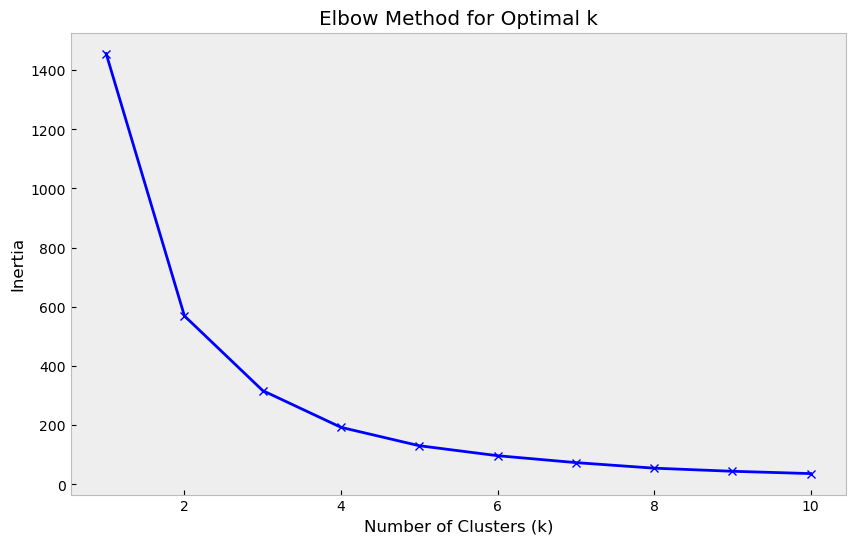

Cluster 2: Mean Price = $83958.98
Cluster 1: Mean Price = $133851.67
Cluster 0: Mean Price = $194839.43
Cluster 3: Mean Price = $312264.64


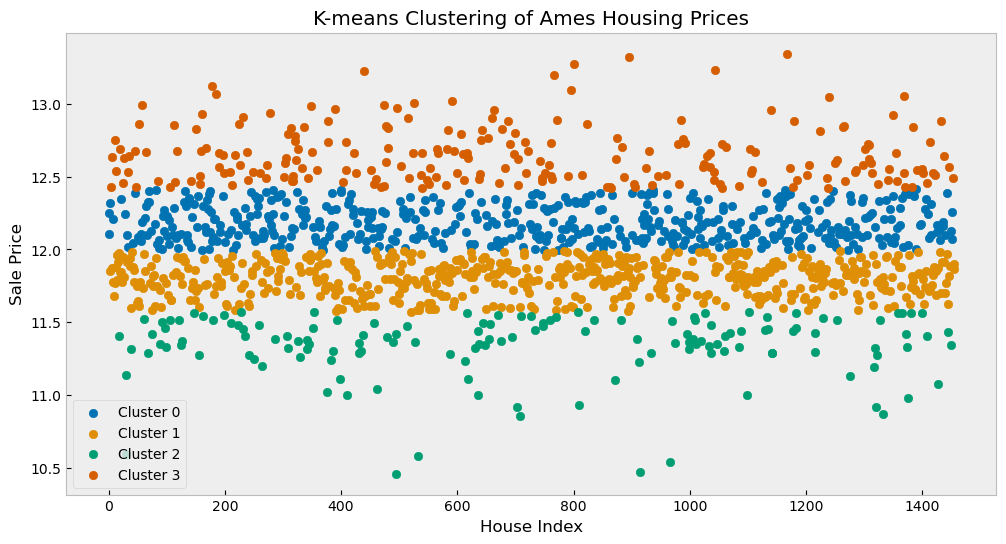

In [94]:
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(scaled_sale_prices)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow curve, let's choose an appropriate number of clusters
# For this example, let's say we choose 4 clusters
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
kmeans.fit(scaled_sale_prices)

# Add cluster labels to the original dataframe
clustering_data = pd.DataFrame(final_study_data)
clustering_data['Cluster'] = kmeans.labels_

# Calculate the mean price for each cluster
cluster_means = clustering_data.groupby('Cluster')['SalePrice'].mean().sort_values()

for cluster, mean_price in cluster_means.items():
    print(f"Cluster {cluster}: Mean Price = ${expm1(mean_price):.2f}")

# Visualize the clusters
plt.figure(figsize=(12, 6))
for i in range(n_clusters):
    cluster_data = clustering_data[clustering_data['Cluster'] == i]
    plt.scatter(cluster_data.index, cluster_data['SalePrice'], label=f'Cluster {i}', color=colorblind_palette[i])

plt.xlabel('House Index')
plt.ylabel('Sale Price')
plt.title('K-means Clustering of Ames Housing Prices')
plt.legend()
plt.show()

#### K-means Clustering + Silhouette Optimization of Ames Housing Prices

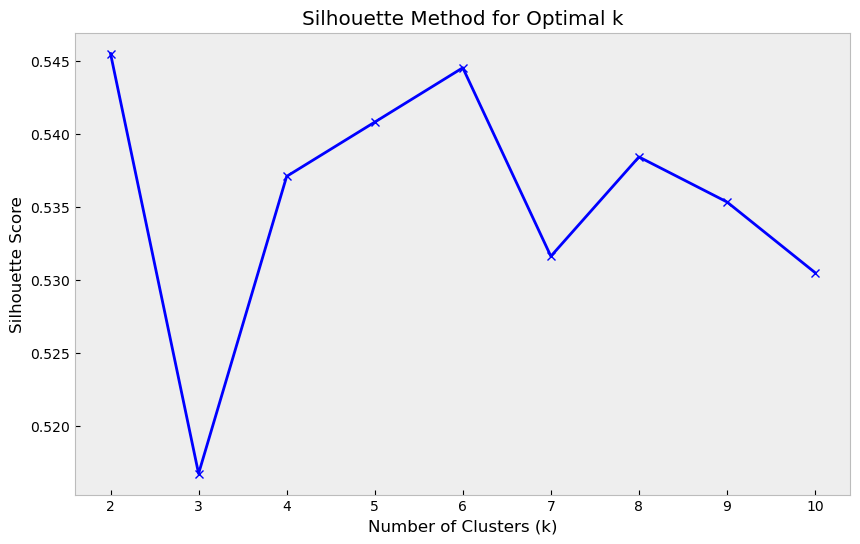

Optimal number of clusters: 2
Cluster 1: Mean Price = $125567.91
Cluster 0: Mean Price = $233574.83


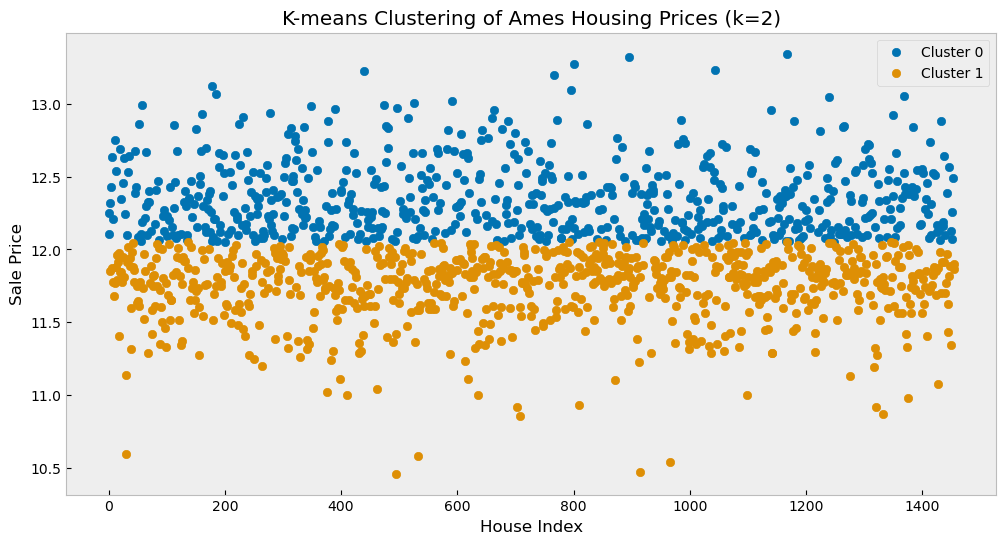

In [95]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
K = range(2, 11)  # Start from 2 clusters as silhouette score is not defined for 1 cluster

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(scaled_sale_prices)
    score = silhouette_score(scaled_sale_prices, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

# Find the optimal number of clusters (highest silhouette score)
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=seed)
kmeans.fit(scaled_sale_prices)

# Add cluster labels to the original dataframe
clustering_data = pd.DataFrame(final_study_data)
clustering_data['Cluster'] = kmeans.labels_

# Calculate the mean price for each cluster
cluster_means = clustering_data.groupby('Cluster')['SalePrice'].mean().sort_values()

# Print the mean prices for each cluster
for cluster, mean_price in cluster_means.items():
    print(f"Cluster {cluster}: Mean Price = ${expm1(mean_price):.2f}")

# Visualize the clusters
plt.figure(figsize=(12, 6))
for i in range(optimal_k):
    cluster_data = clustering_data[clustering_data['Cluster'] == i]
    plt.scatter(cluster_data.index, cluster_data['SalePrice'], label=f'Cluster {i}', color=colorblind_palette[i])

plt.xlabel('House Index')
plt.ylabel('Sale Price')
plt.title(f'K-means Clustering of Ames Housing Prices (k={optimal_k})')
plt.legend()
plt.show()

## Gaussian Mixture Model + BIC Score of Ames Housing Prices

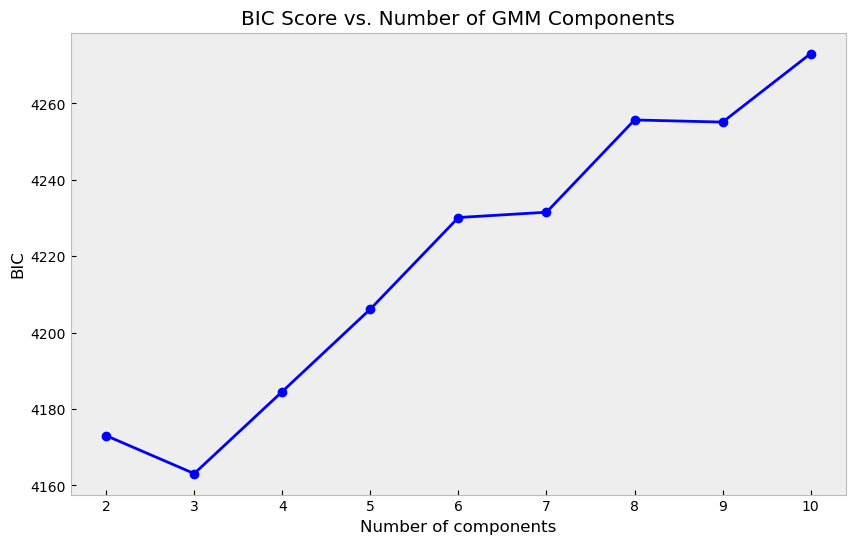

The optimal number of components based on BIC: 3



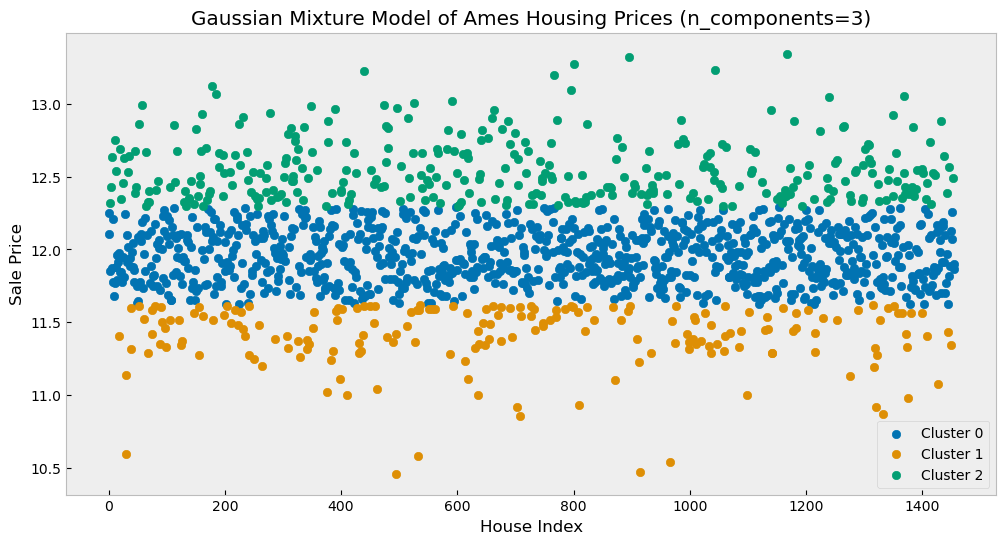

In [96]:
from sklearn.mixture import GaussianMixture

# Calculate BIC and silhouette scores for different numbers of components
n_components_range = range(2, 11)
bic = []
silhouette_scores = []

for n_components in n_components_range:
    # Fit a Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, random_state=seed)
    gmm.fit(scaled_sale_prices)

    # Calculate BIC score
    bic.append(gmm.bic(scaled_sale_prices))

# Plot the BIC scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('BIC Score vs. Number of GMM Components')
plt.show()

# Find the optimal number of components (lowest BIC score)
optimal_n_components = n_components_range[bic.index(min(bic))]
print(f"The optimal number of components based on BIC: {optimal_n_components}\n")

# Fit the final GMM model with the optimal number of components
gmm = GaussianMixture(n_components=optimal_n_components, random_state=seed)
gmm.fit(scaled_sale_prices)

# Add cluster labels to the original dataframe
gmm_clustering_data = pd.DataFrame(final_study_data)
gmm_clustering_data['Cluster'] = gmm.predict(scaled_sale_prices)

# Calculate the mean price for each cluster
cluster_sale_price = gmm_clustering_data.groupby('Cluster')['SalePrice']
cluster_means = cluster_sale_price.mean().sort_values()
cluster_mins = cluster_sale_price.min()
cluster_maxs = cluster_sale_price.max()

# Visualize the clusters
plt.figure(figsize=(12, 6))
for i in range(optimal_n_components):
    cluster_data = gmm_clustering_data[gmm_clustering_data['Cluster'] == i]
    plt.scatter(cluster_data.index, cluster_data['SalePrice'], label=f'Cluster {i}', color=colorblind_palette[i])

plt.xlabel('House Index')
plt.ylabel('Sale Price')
plt.title(f'Gaussian Mixture Model of Ames Housing Prices (n_components={optimal_n_components})')
plt.legend()
plt.show()

### SalePrice Clustering Results

Using three different clustering methods to analyze the SalePrice values in the Ames, Iowa dataset, I identified various clusters:

- K-means Clustering + Elbow Optimization: Grouped houses into 4 clusters.
- K-means Clustering + Silhouette Optimization: Grouped houses into 2 clusters.
- Gaussian Mixture Model + Bayesian Information Criterion (BIC) Score: Grouped houses into 3 clusters.

To simplify the analysis and provide a clearer view of the housing market, I chose to use the results from the GMM+BIC method, defining three distinct housing segments based on their sale price ranges:

- **Luxury Homes Segment**: These are the high-end, more expensive homes.
- **Mid-Range Homes Segment**: These average-priced homes fall in the middle range.
- **Budget Homes Segment**: These are the more affordable, lower-priced homes.

In [97]:
#
# Define cluster labels to present the business conclussion
#
# cluster 1: Mean Price = $89484.06 [$35K - $111K]
# cluster 0: Mean Price = $155502.32 [$112K - $218K]
# cluster 2: Mean Price = $282697.23 [$219K - $625K]
#
cluster_labels = [
    "Mid-Range Homes Segment",
    "Budget Homes Segment",
    "Luxury Homes Segment",
]

# Print the mean prices for each cluster
for cluster, mean_price in cluster_means.items():
    print(f"{cluster_labels[cluster]} (cluster {cluster}): Mean Price = ${expm1(mean_price)/1000:.0f}K [${expm1(cluster_mins[cluster])/1000:.0f}K - ${expm1(cluster_maxs[cluster])/1000:.0f}K]")


Budget Homes Segment (cluster 1): Mean Price = $89K [$35K - $111K]
Mid-Range Homes Segment (cluster 0): Mean Price = $156K [$112K - $218K]
Luxury Homes Segment (cluster 2): Mean Price = $283K [$219K - $625K]


#### Main House Price Ranges in Ames, Iowa

This classification helps understand the housing market by segmenting it into easily understandable price ranges.

Segment | Mean Price | Minimum Price | Maximum Price
---------|----------|---------|---------
 Luxury Homes | $283K | $219K | $625K
 Mid-Range Homes | $156K | $112K | $218K
 Budget Homes | $89K | $35K | $111K

## Which Areas Can You Locate These Price Ranges?

Based on the segmentation of budget, mid-range, and luxury homes, I can now identify the top neighborhoods where these houses are located. This helps us understand where different types of homes are most commonly found in the Ames, Iowa, housing market.


Top 5 neighborhoods for Mid-Range Homes Segment:
  Blueste: 1.00
  NPkVill: 1.00
  Mitchel: 0.90
  Sawyer: 0.89
  SWISU: 0.88

Top 5 neighborhoods for Budget Homes Segment:
  MeadowV: 0.71
  IDOTRR: 0.62
  BrDale: 0.56
  OldTown: 0.39
  Edwards: 0.38

Top 5 neighborhoods for Luxury Homes Segment:
  NoRidge: 0.97
  NridgHt: 0.82
  StoneBr: 0.72
  Timber: 0.58
  Somerst: 0.52


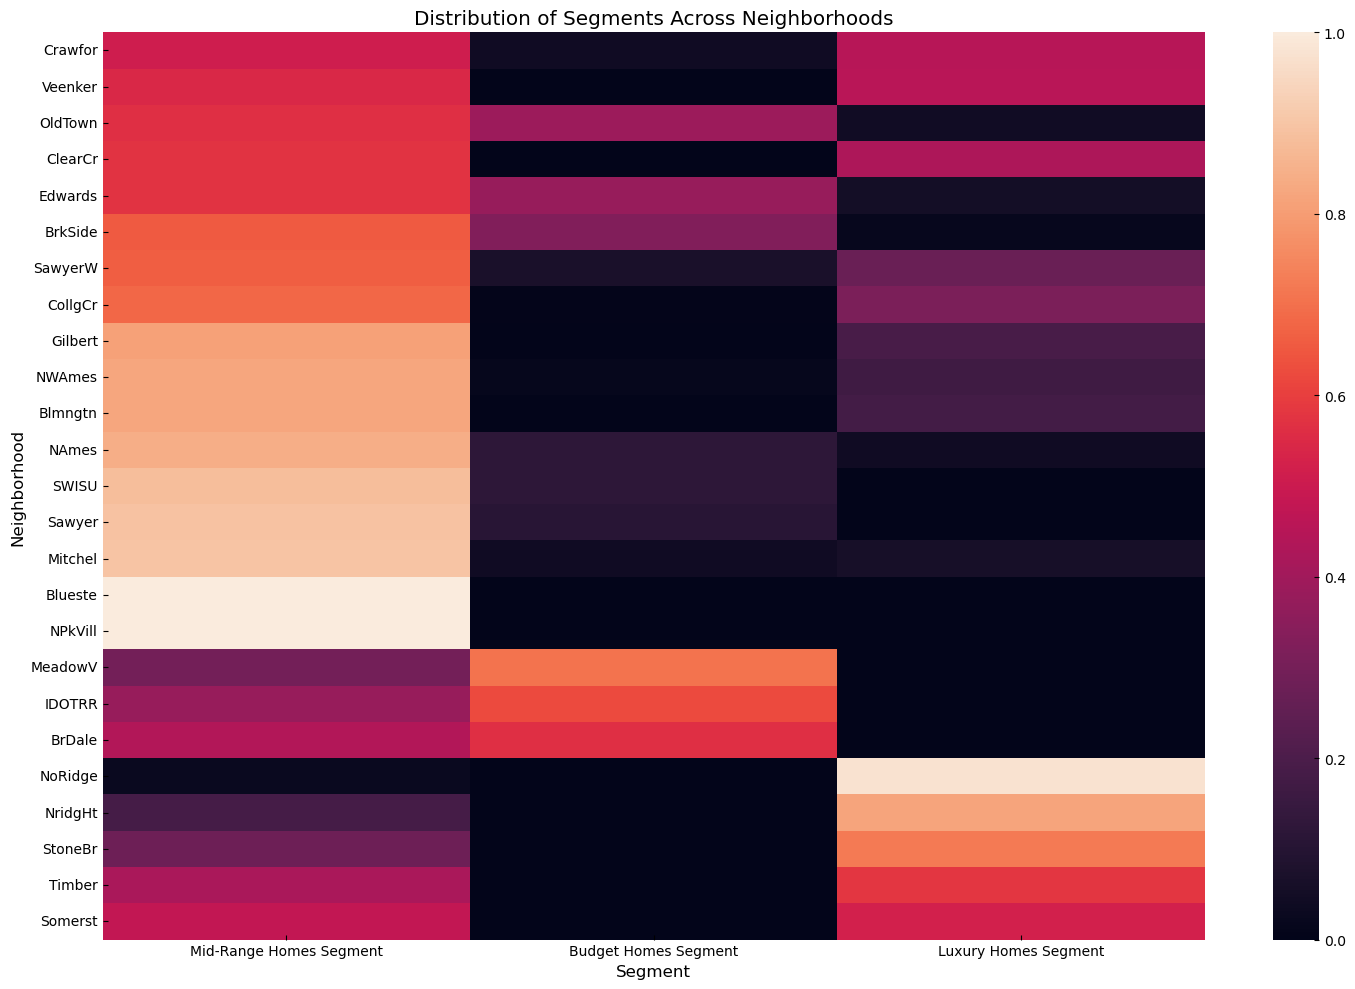

In [98]:
# Analyze the distribution of clusters across neighborhoods
neighborhood_clusters = gmm_clustering_data.groupby('Neighborhood')['Cluster'].value_counts(normalize=True).unstack()

# Fill NaN values with 0
neighborhood_clusters = neighborhood_clusters.fillna(0)

# Sort neighborhoods by the most prevalent cluster
dominant_cluster = neighborhood_clusters.idxmax(axis=1)
neighborhood_clusters['Dominant_Cluster'] = dominant_cluster
neighborhood_clusters = neighborhood_clusters.sort_values(by=['Dominant_Cluster'] + list(neighborhood_clusters.columns[:-1]))

# Identify top neighborhoods for each cluster
top_neighborhoods = {}
for cluster in range(3):
    top_neighborhoods[cluster] = neighborhood_clusters[cluster].nlargest(5)

for cluster, neighborhoods in top_neighborhoods.items():
    print(f"\nTop 5 neighborhoods for {cluster_labels[cluster]}:")
    for neighborhood, proportion in neighborhoods.items():
        print(f"  {neighborhood}: {proportion:.2f}")

# Plot the distribution of clusters across neighborhoods
plt.figure(figsize=(15, 10))
ax = sns.heatmap(neighborhood_clusters.iloc[:, :-1])
ax.set_xticklabels(cluster_labels)
plt.title('Distribution of Segments Across Neighborhoods')
plt.ylabel('Neighborhood')
plt.xlabel('Segment')
plt.tight_layout()
plt.show()


These are the top 5 neighborhoods for each segment:

- **Luxury Homes Segment**: These neighborhoods are known for their expensive houses.
    - NoRidge 
    - NridgHt 
    - StoneBr
    - Timber
    - Somerst
- **Mid-Range Homes Segment**: These neighborhoods feature homes with average prices that fall in the middle range.
    - Blueste
    - NPkVill
    - Mitchel
    - Sawyer
    - SWISU
- **Budget Homes Segment**: These neighborhoods are characterized by more affordable, lower-priced houses.
    - MeadowV
    - IDOTRR
    - BrDale
    - OldTown
    - Edwards

## What features best predict the price range of each home?

To determine which features most accurately predict the price range of each home, I analyzed the overall housing market and the previously identified segments: budget, mid-range, and luxury homes. This approach allows me to identify the main factors influencing the entire market and the specific segments.

I used the Random Forest Regressor, AdaBoost Regressor, and a Decision Tree Regressor to pinpoint the key features. For this analysis, I used the default settings of these regressors, but further studies could explore other models and fine-tune the parameters for even better results.

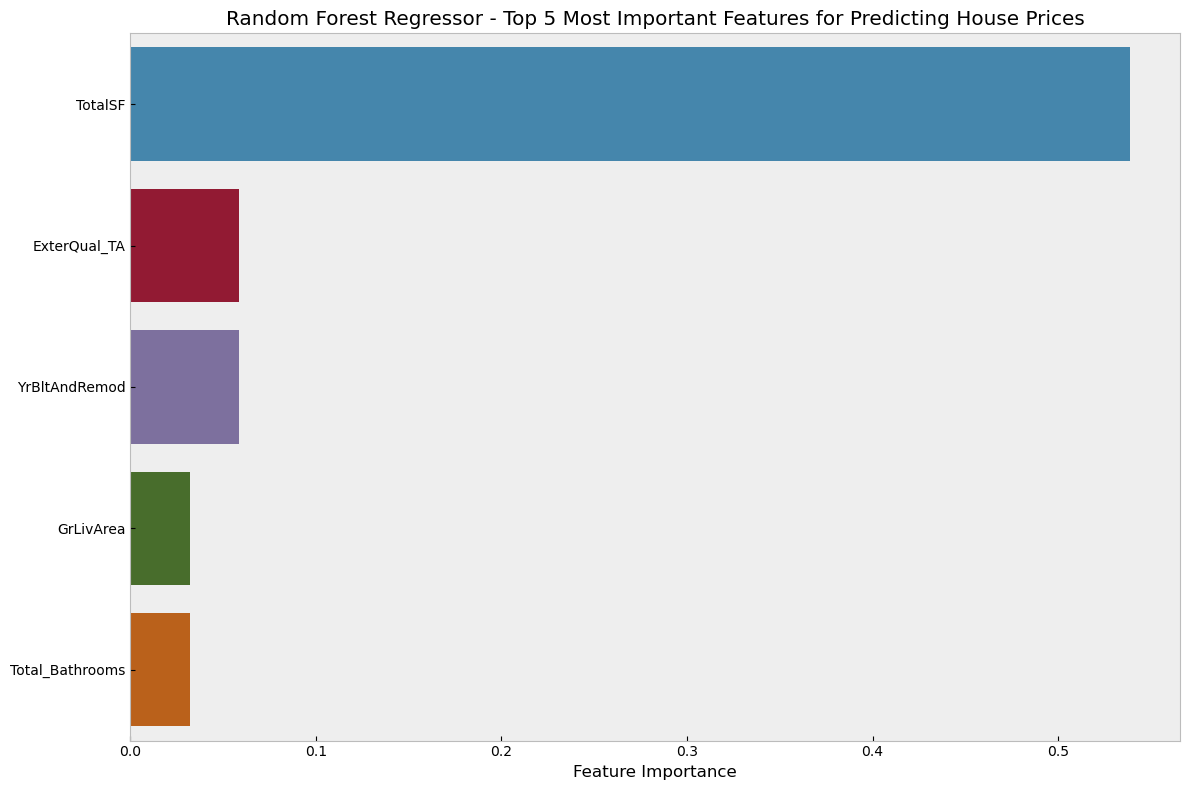

Random Forest Regressor - Top 5 most important features:
1. TotalSF: 0.5387
2. ExterQual_TA: 0.0587
3. YrBltAndRemod: 0.0585
4. GrLivArea: 0.0321
5. Total_Bathrooms: 0.0320


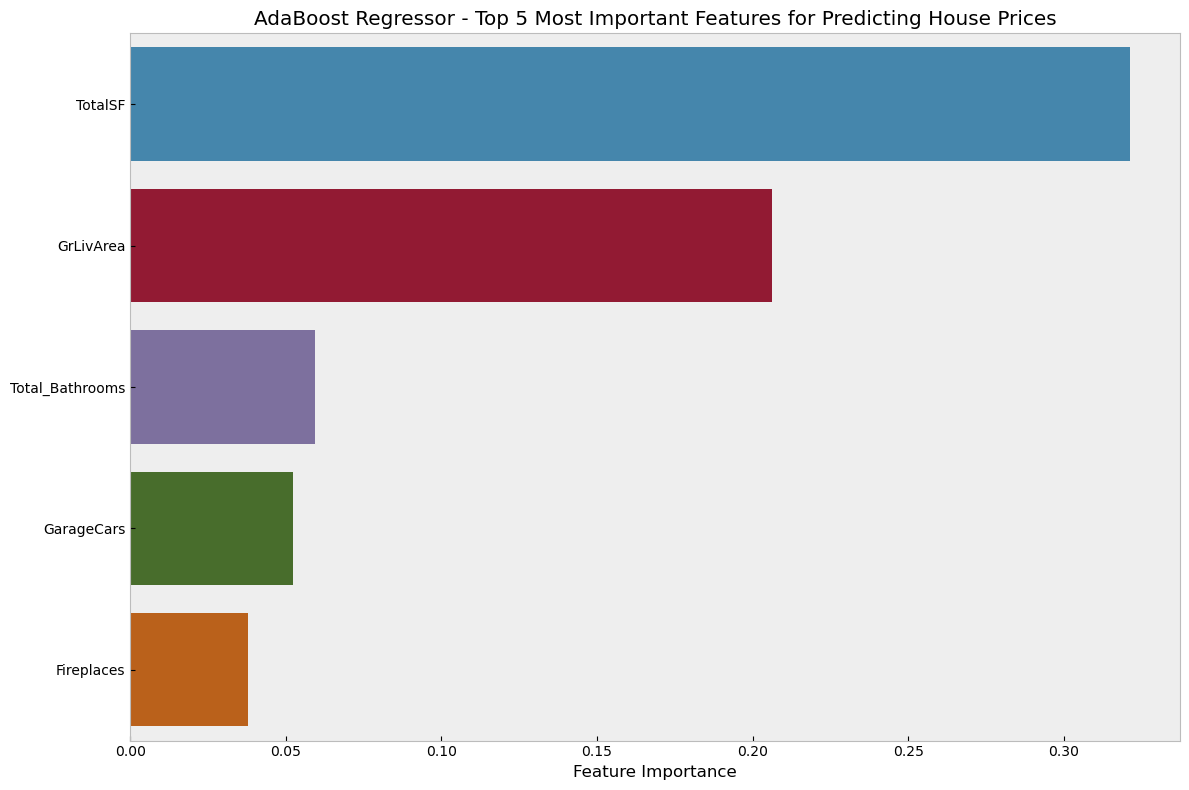

AdaBoost Regressor - Top 5 most important features:
1. TotalSF: 0.3212
2. GrLivArea: 0.2062
3. Total_Bathrooms: 0.0593
4. GarageCars: 0.0524
5. Fireplaces: 0.0379


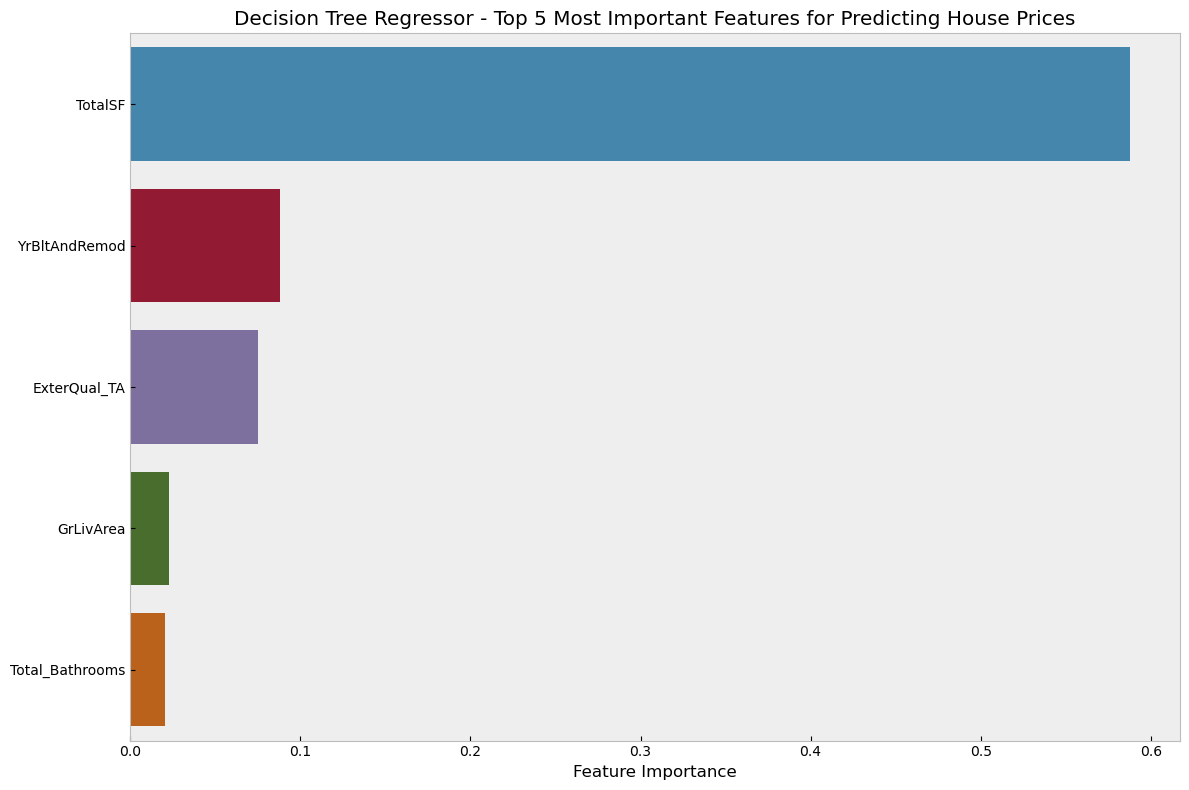

Decision Tree Regressor - Top 5 most important features:
1. TotalSF: 0.5877
2. YrBltAndRemod: 0.0880
3. ExterQual_TA: 0.0751
4. GrLivArea: 0.0227
5. Total_Bathrooms: 0.0205


In [99]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Separate features and target
X = encoded_study_data.drop('SalePrice', axis=1)
y = encoded_study_data['SalePrice']

def regresor_fit_and_print(title, X, y, regressor):
    """
    Fit and print a regressor results
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    regressor.fit(X_train, y_train)

    importances = regressor.feature_importances_
    feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importances.values[:5], y=feature_importances.index[:5])
    plt.title(title + ' - Top 5 Most Important Features for Predicting House Prices')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()

    print(title + " - Top 5 most important features:")
    for i, (feature, importance) in enumerate(feature_importances[:5].items(), 1):
        print(f"{i}. {feature}: {importance:.4f}")

random_forest_regressor = RandomForestRegressor(random_state=seed)
regresor_fit_and_print("Random Forest Regressor", X, y, random_forest_regressor)

ada_boost_regressor = AdaBoostRegressor(random_state=seed)
regresor_fit_and_print("AdaBoost Regressor", X, y, ada_boost_regressor)

decision_tree_regressor = DecisionTreeRegressor(random_state=seed)
regresor_fit_and_print("Decision Tree Regressor", X, y, decision_tree_regressor)

According to the results from these regressors, here are the top 7 features that drive housing prices in the general market:

- Random Forest Regressor:
    - TotalSF: Total square footage of the house.
    - ExterQual_TA: Quality of the exterior material (Average/Typical).
    - YrBltAndRemod: Combined years since the house was built and any renovations.
    - GrLivArea: Above-ground living area.
    - Total_Bathrooms: Total number of bathrooms in the house.
    - YearBuilt: The year the house was built.
    - GarageArea: Size of the garage.
- AdaBoost Regressor:
    - TotalSF: Total square footage of the house.
    - GrLivArea: Above-ground living area.
    - Total_Bathrooms: Total number of bathrooms in the house.
    - GarageCars: Number of cars the garage can hold.
    - Fireplaces: Number of fireplaces in the house.
    - GarageYrBlt: The year the garage was built.
    - GarageArea: Size of the garage.
- Decision Tree Regressor:
    - TotalSF: Total square footage of the house.
    - YrBltAndRemod: Combined years since the house was built and any renovations.
    - ExterQual_TA: Quality of the exterior material.
    - GrLivArea: Above-ground living area.
    - Total_Bathrooms: Total number of bathrooms in the house.
    - KitchenAbvGr: Number of kitchens above ground.
    - BsmtFinSF1: Finished square footage of the basement.

### Conclusions

Based on the results from these regressors, I conclude that several key factors strongly influence the sale price of homes:

- **House Surface**: Total square footage and above-ground living area are crucial in determining home value.
- **Garage Characteristics**: The size of the garage, the number of cars it can hold, and the year it was built are significant predictors of price.
- **House Age**: The year the house was built and the combined years since any renovations are influential factors.
- **Total Bathrooms**: The total number of bathrooms in the house also significantly predicts price.

Understanding these features helps to focus on what truly matters when evaluating home prices.

### Sale Price Predictors for Budget, Mid-Range, and Luxury Homes

I repeated the analysis for each category to understand the different factors influencing the sale price of homes in the budget, mid-range, and luxury segments. This advanced study reveals the various considerations that buyers might prioritize within each segment.

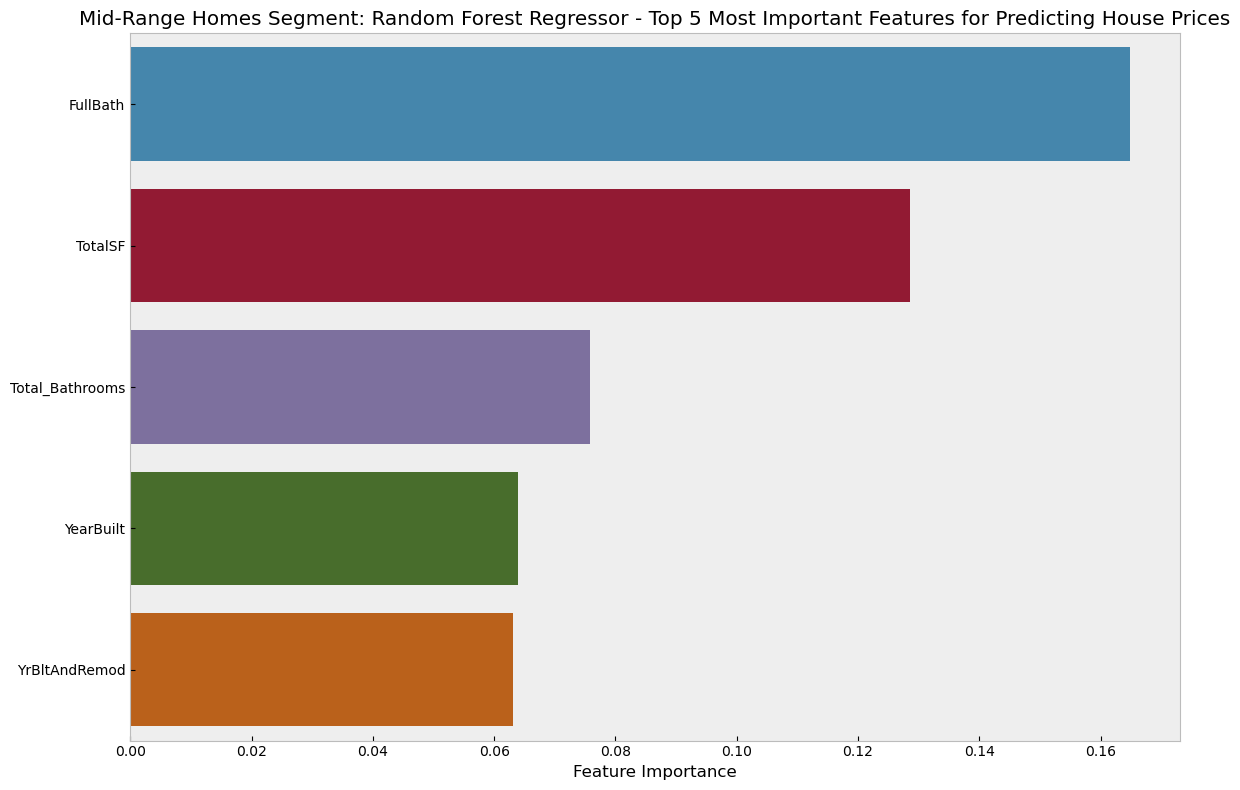

Mid-Range Homes Segment: Random Forest Regressor - Top 5 most important features:
1. FullBath: 0.1648
2. TotalSF: 0.1285
3. Total_Bathrooms: 0.0758
4. YearBuilt: 0.0640
5. YrBltAndRemod: 0.0631


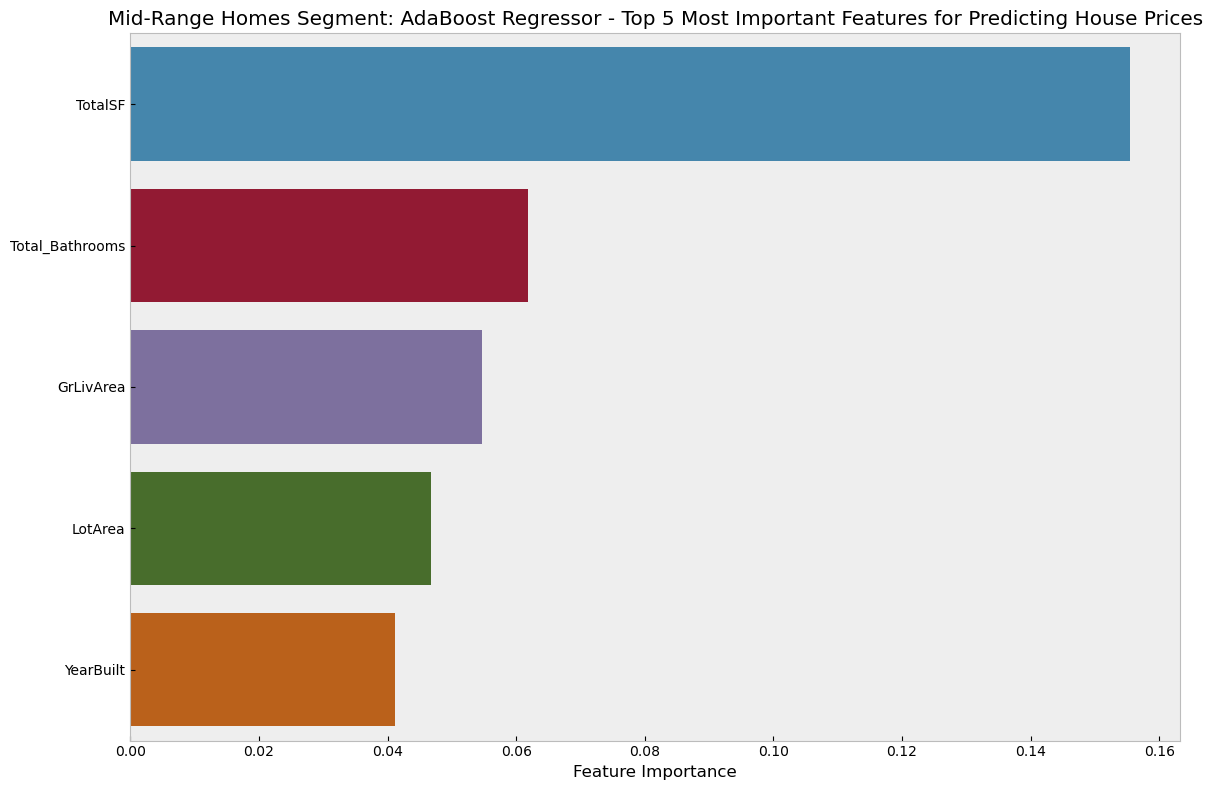

Mid-Range Homes Segment: AdaBoost Regressor - Top 5 most important features:
1. TotalSF: 0.1554
2. Total_Bathrooms: 0.0618
3. GrLivArea: 0.0548
4. LotArea: 0.0467
5. YearBuilt: 0.0412


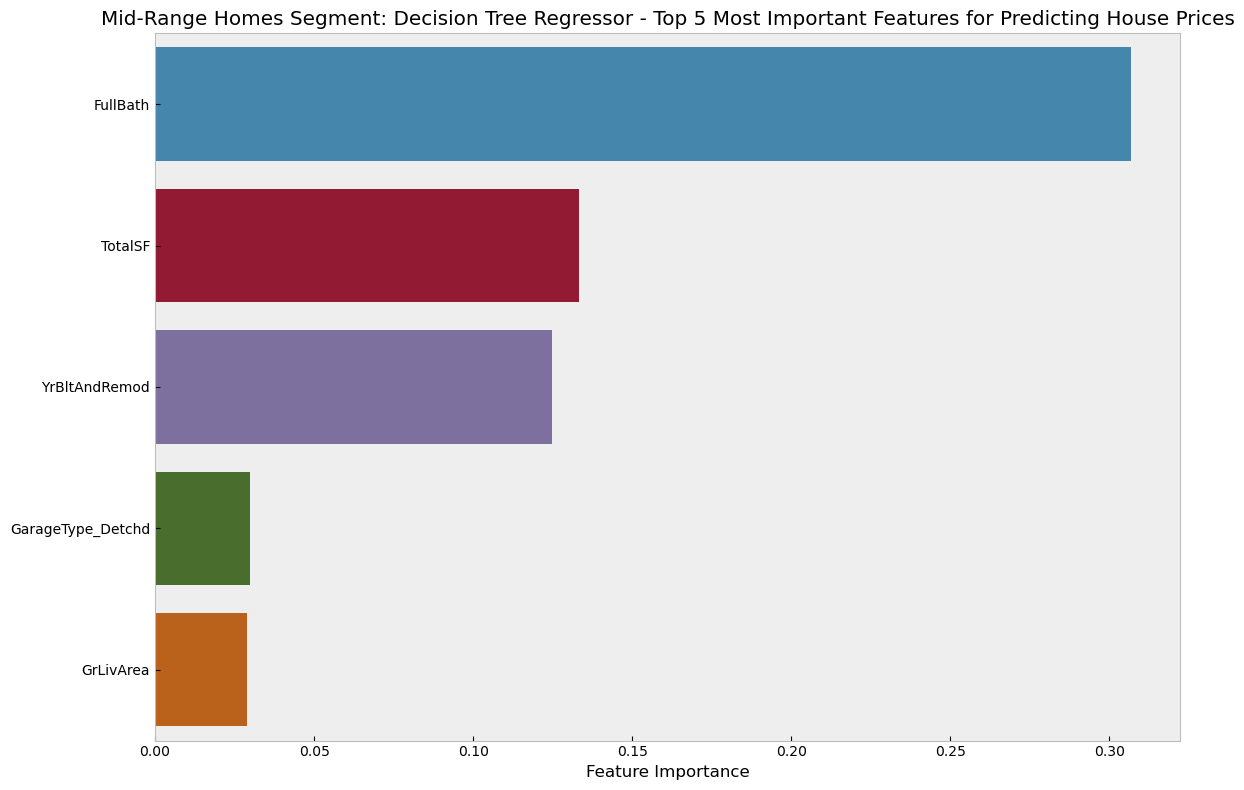

Mid-Range Homes Segment: Decision Tree Regressor - Top 5 most important features:
1. FullBath: 0.3068
2. TotalSF: 0.1332
3. YrBltAndRemod: 0.1247
4. GarageType_Detchd: 0.0299
5. GrLivArea: 0.0290


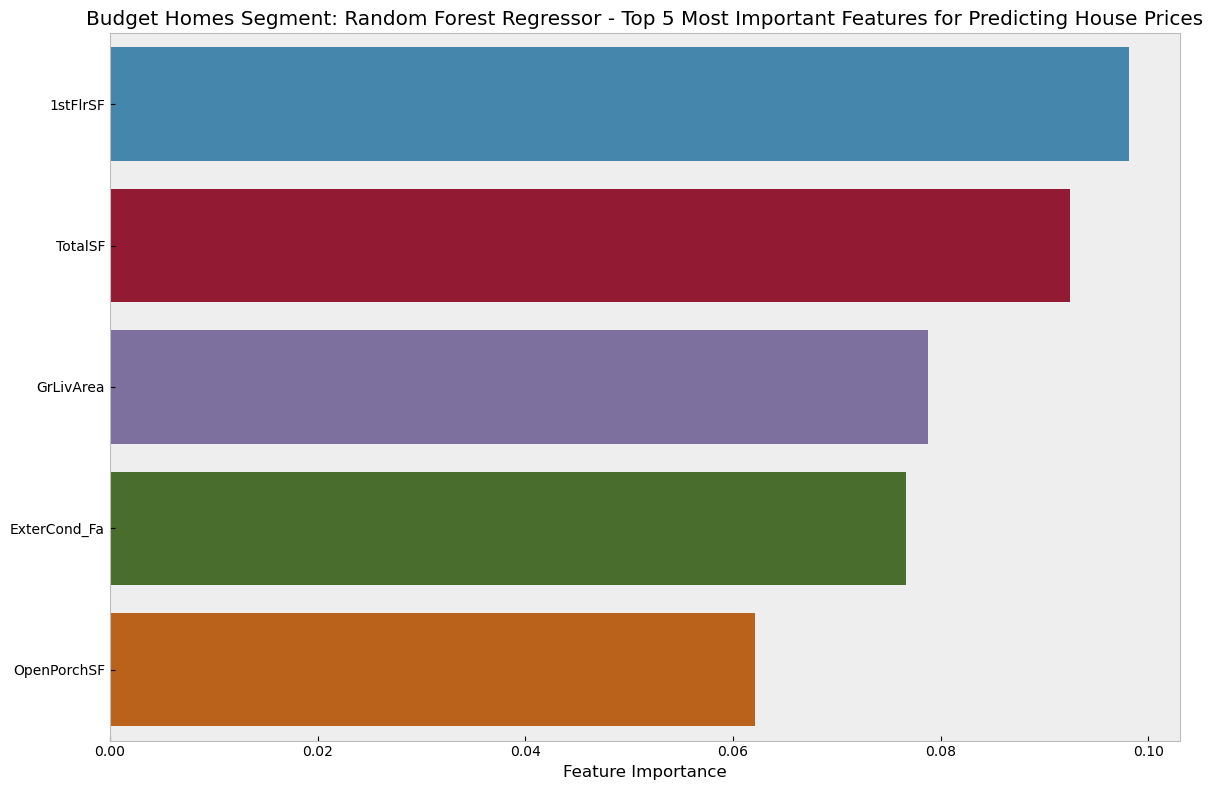

Budget Homes Segment: Random Forest Regressor - Top 5 most important features:
1. 1stFlrSF: 0.0982
2. TotalSF: 0.0924
3. GrLivArea: 0.0788
4. ExterCond_Fa: 0.0767
5. OpenPorchSF: 0.0622


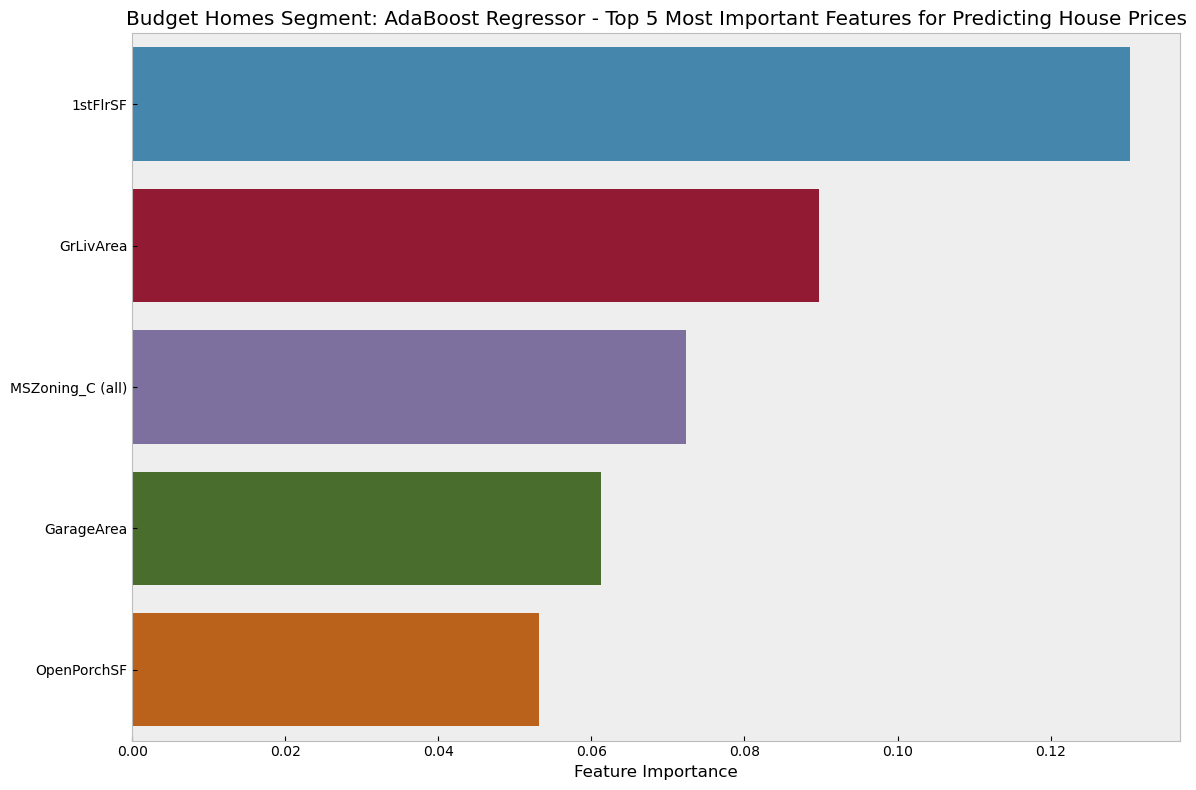

Budget Homes Segment: AdaBoost Regressor - Top 5 most important features:
1. 1stFlrSF: 0.1304
2. GrLivArea: 0.0897
3. MSZoning_C (all): 0.0724
4. GarageArea: 0.0612
5. OpenPorchSF: 0.0532


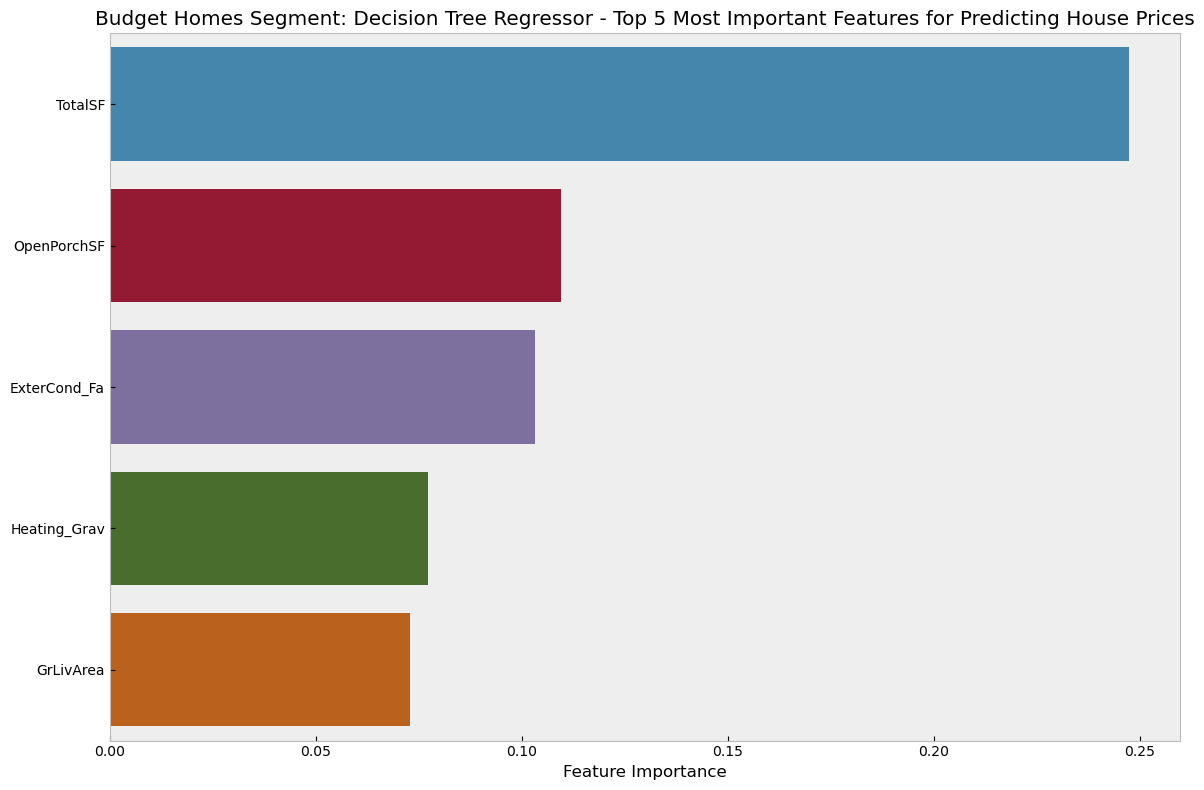

Budget Homes Segment: Decision Tree Regressor - Top 5 most important features:
1. TotalSF: 0.2474
2. OpenPorchSF: 0.1096
3. ExterCond_Fa: 0.1031
4. Heating_Grav: 0.0772
5. GrLivArea: 0.0728


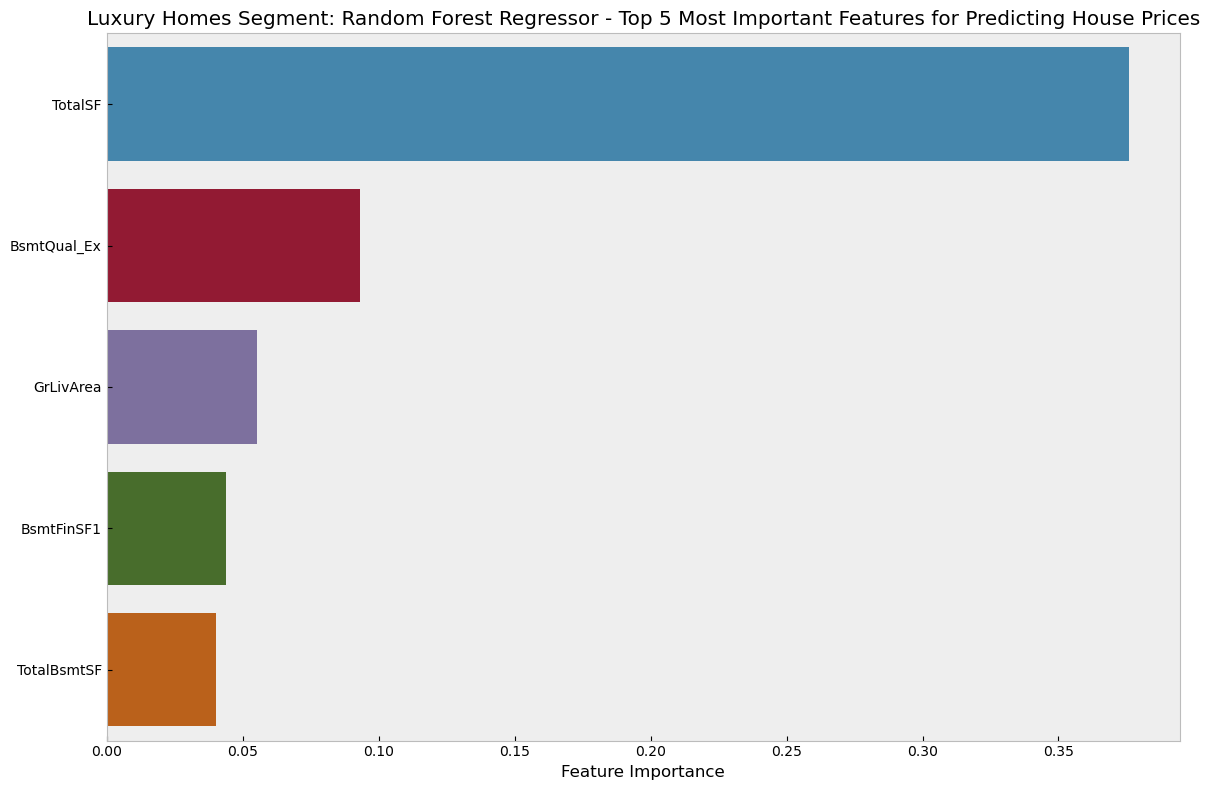

Luxury Homes Segment: Random Forest Regressor - Top 5 most important features:
1. TotalSF: 0.3759
2. BsmtQual_Ex: 0.0930
3. GrLivArea: 0.0551
4. BsmtFinSF1: 0.0438
5. TotalBsmtSF: 0.0403


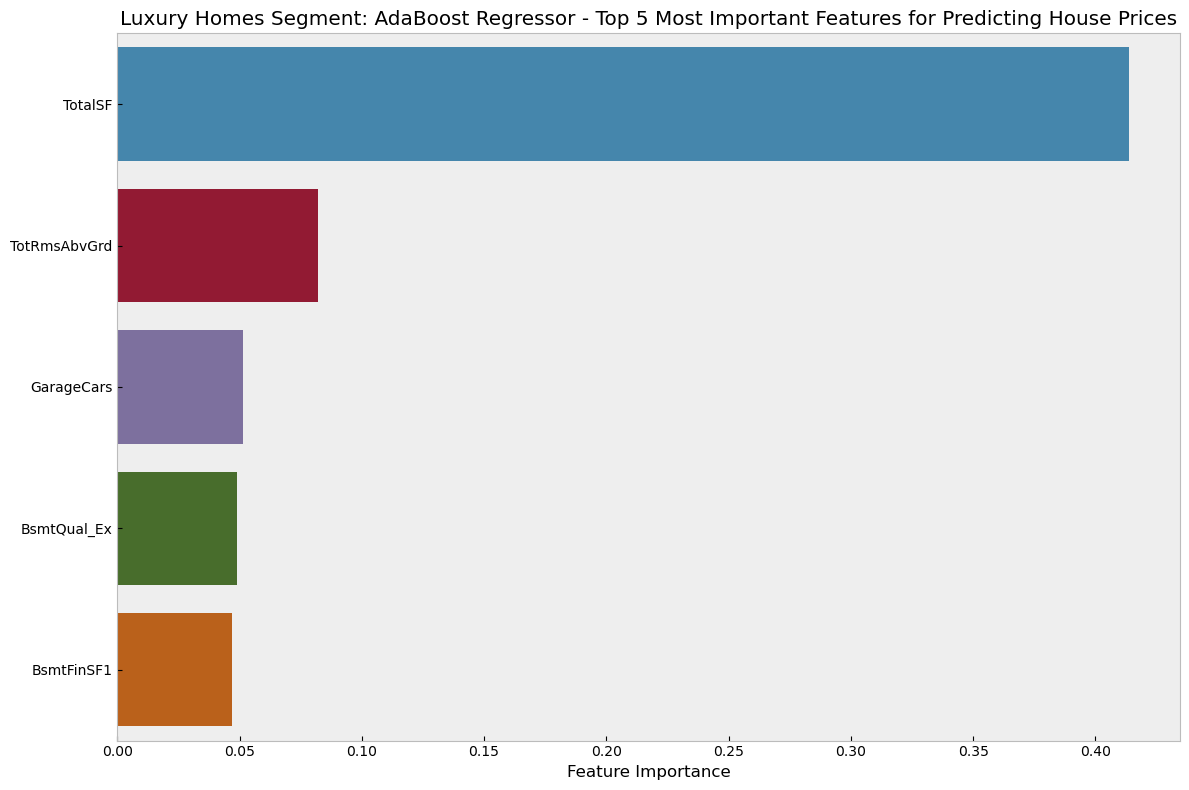

Luxury Homes Segment: AdaBoost Regressor - Top 5 most important features:
1. TotalSF: 0.4139
2. TotRmsAbvGrd: 0.0821
3. GarageCars: 0.0514
4. BsmtQual_Ex: 0.0488
5. BsmtFinSF1: 0.0467


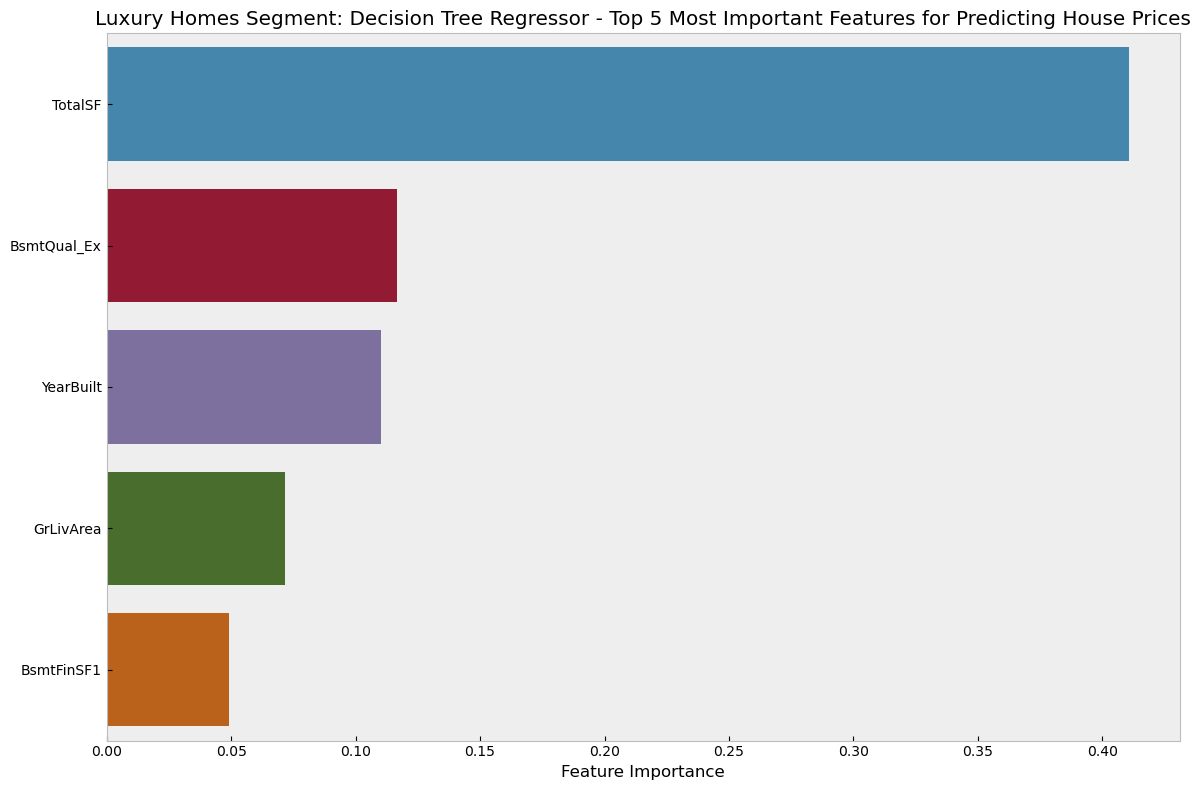

Luxury Homes Segment: Decision Tree Regressor - Top 5 most important features:
1. TotalSF: 0.4106
2. BsmtQual_Ex: 0.1165
3. YearBuilt: 0.1103
4. GrLivArea: 0.0718
5. BsmtFinSF1: 0.0489


In [ ]:
for i in range(optimal_n_components):
    cluster_data = gmm_clustering_data[gmm_clustering_data['Cluster'] == i]
    final_cluster_data = one_hot_encode(cluster_data)
    X_cluster = final_cluster_data.drop(columns=['SalePrice'])
    y_cluster = final_cluster_data['SalePrice']

    random_forest_regressor = RandomForestRegressor(random_state=seed)
    regresor_fit_and_print(f"{cluster_labels[i]}: Random Forest Regressor", X_cluster, y_cluster, random_forest_regressor)

    ada_boost_regressor = AdaBoostRegressor(random_state=seed)
    regresor_fit_and_print(f"{cluster_labels[i]}: AdaBoost Regressor", X_cluster, y_cluster, ada_boost_regressor)

    decision_tree_regressor = DecisionTreeRegressor(random_state=seed)
    regresor_fit_and_print(f"{cluster_labels[i]}: Decision Tree Regressor", X_cluster, y_cluster, decision_tree_regressor)

### Conclusions

From the top 5 most essential features for budget, mid-range, and luxury homes, we notice some variables previously identified for the general market. By excluding these general commonalities, we can delve deeper and identify patterns that specifically increase the sale price within each segment. Here are my findings:

- **Luxury Homes Segment**
    - **Livable Basement Finished Surface** (BsmtFinSF1 and TotalBsmtSF) and the height of the basement (BsmtQual). Excellent quality basements (100+ inches) add significant value.
    - **Total Rooms Above Grade**: More rooms (excluding bathrooms) increase the home's value.
- **Mid-Range Homes Segment**
    - **Full Bathrooms Above Grade** (FullBath): More full bathrooms on the main floors significantly impact the sale price.
    - **Detached Garage Location** (GarageType Detchd): Detached garages are valuable in this segment.
- **Budget Homes Segment**:
    - **Open Porch Area** (OpenPorchSF): Larger open porch areas contribute to higher prices.
    - **First Floor Area** (1stFlrSF): A more extensive first-floor area adds value.
    - **Exterior Material Condition** (ExterCond): The condition of the exterior material, mainly if it's excellent or fair, impacts the sale price.

Understanding these specific drivers within each segment helps us better predict and evaluate home prices based on various characteristics and amenities. Further studies could refine these insights and explore additional features influencing housing prices.

### Parting Thoughts

What started as a simple assignment for the Udemy Data Scientist Nanodegree Program was an incredible learning journey. I applied various data science techniques, including:

- Setting clear objectives
- Exploring and visualizing data
- Identifying and removing outliers
- Addressing skewed distributions
- Handling missing data
- Normalizing numerical features
- Conducting bivariate analysis
- Extracting insights from the Ames, Iowa housing market

This experience deepened my understanding of the data science workflow and the CRISP-DM process. It answered the initial questions and sparked my curiosity about further exploration in the field.

## LICENSE

Attribution 4.0 International - CC BY 4.0 <https://creativecommons.org/licenses/by/4.0/>

<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/anibalsanchez/answering-house-prices-questions-based-on-advanced-regression-techniques">Answering House Prices Questions using Advanced Regression Techniques</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.linkedin.com/in/anibalsanchez/">Anibal H. Sanchez Perez</a> is licensed under <a href="https://creativecommons.org/licenses/by/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Creative Commons Attribution 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" alt=""><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" alt=""></a></p>